In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Die Differentialgleichung lautet:
$v(t) = k'(t) = 2 * \left( \begin{pmatrix}0\\t\end{pmatrix} - k(t) \right)$

In [2]:
step = 10**(-3)
length = 1/step
time = np.arange(0, 1-step, step)
mouse = np.vstack((np.zeros(length-1), time))
cat = np.zeros((2, length))
cat[0, 0] = 1 # x-Koordinate der Katze zum Zeitpunkt 0, Anfangswert

In [3]:
for i, m in enumerate(mouse.transpose()):
    cat[:,i+1] = cat[:,i] + step * 2 * (m - cat[:,i])

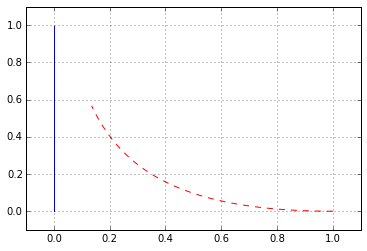

In [4]:
plt.plot(cat[0], cat[1], 'r--', mouse[0], mouse[1], 'b')
plt.axis([-0.1, 1.1, -0.1, 1.1])
plt.grid()
plt.show()